# Histogram

Compare score distributions across Hogwarts houses for each course.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
fileSrc = "../data/dataset_train.csv"
df = pd.read_csv(fileSrc, index_col=0)

In [19]:
courses = df.select_dtypes(include=['float64']).columns
courses

Index(['Arithmancy', 'Astronomy', 'Herbology', 'Defense Against the Dark Arts',
       'Divination', 'Muggle Studies', 'Ancient Runes', 'History of Magic',
       'Transfiguration', 'Potions', 'Care of Magical Creatures', 'Charms',
       'Flying'],
      dtype='object')

## Delete Astronomy

As we saw in the `discovery.ipynb` file _Astronomy_ and _Defense Against the Dark Arts_ are the same data at diferent scales.

In [20]:
courses = courses.drop('Astronomy')
courses

Index(['Arithmancy', 'Herbology', 'Defense Against the Dark Arts',
       'Divination', 'Muggle Studies', 'Ancient Runes', 'History of Magic',
       'Transfiguration', 'Potions', 'Care of Magical Creatures', 'Charms',
       'Flying'],
      dtype='object')

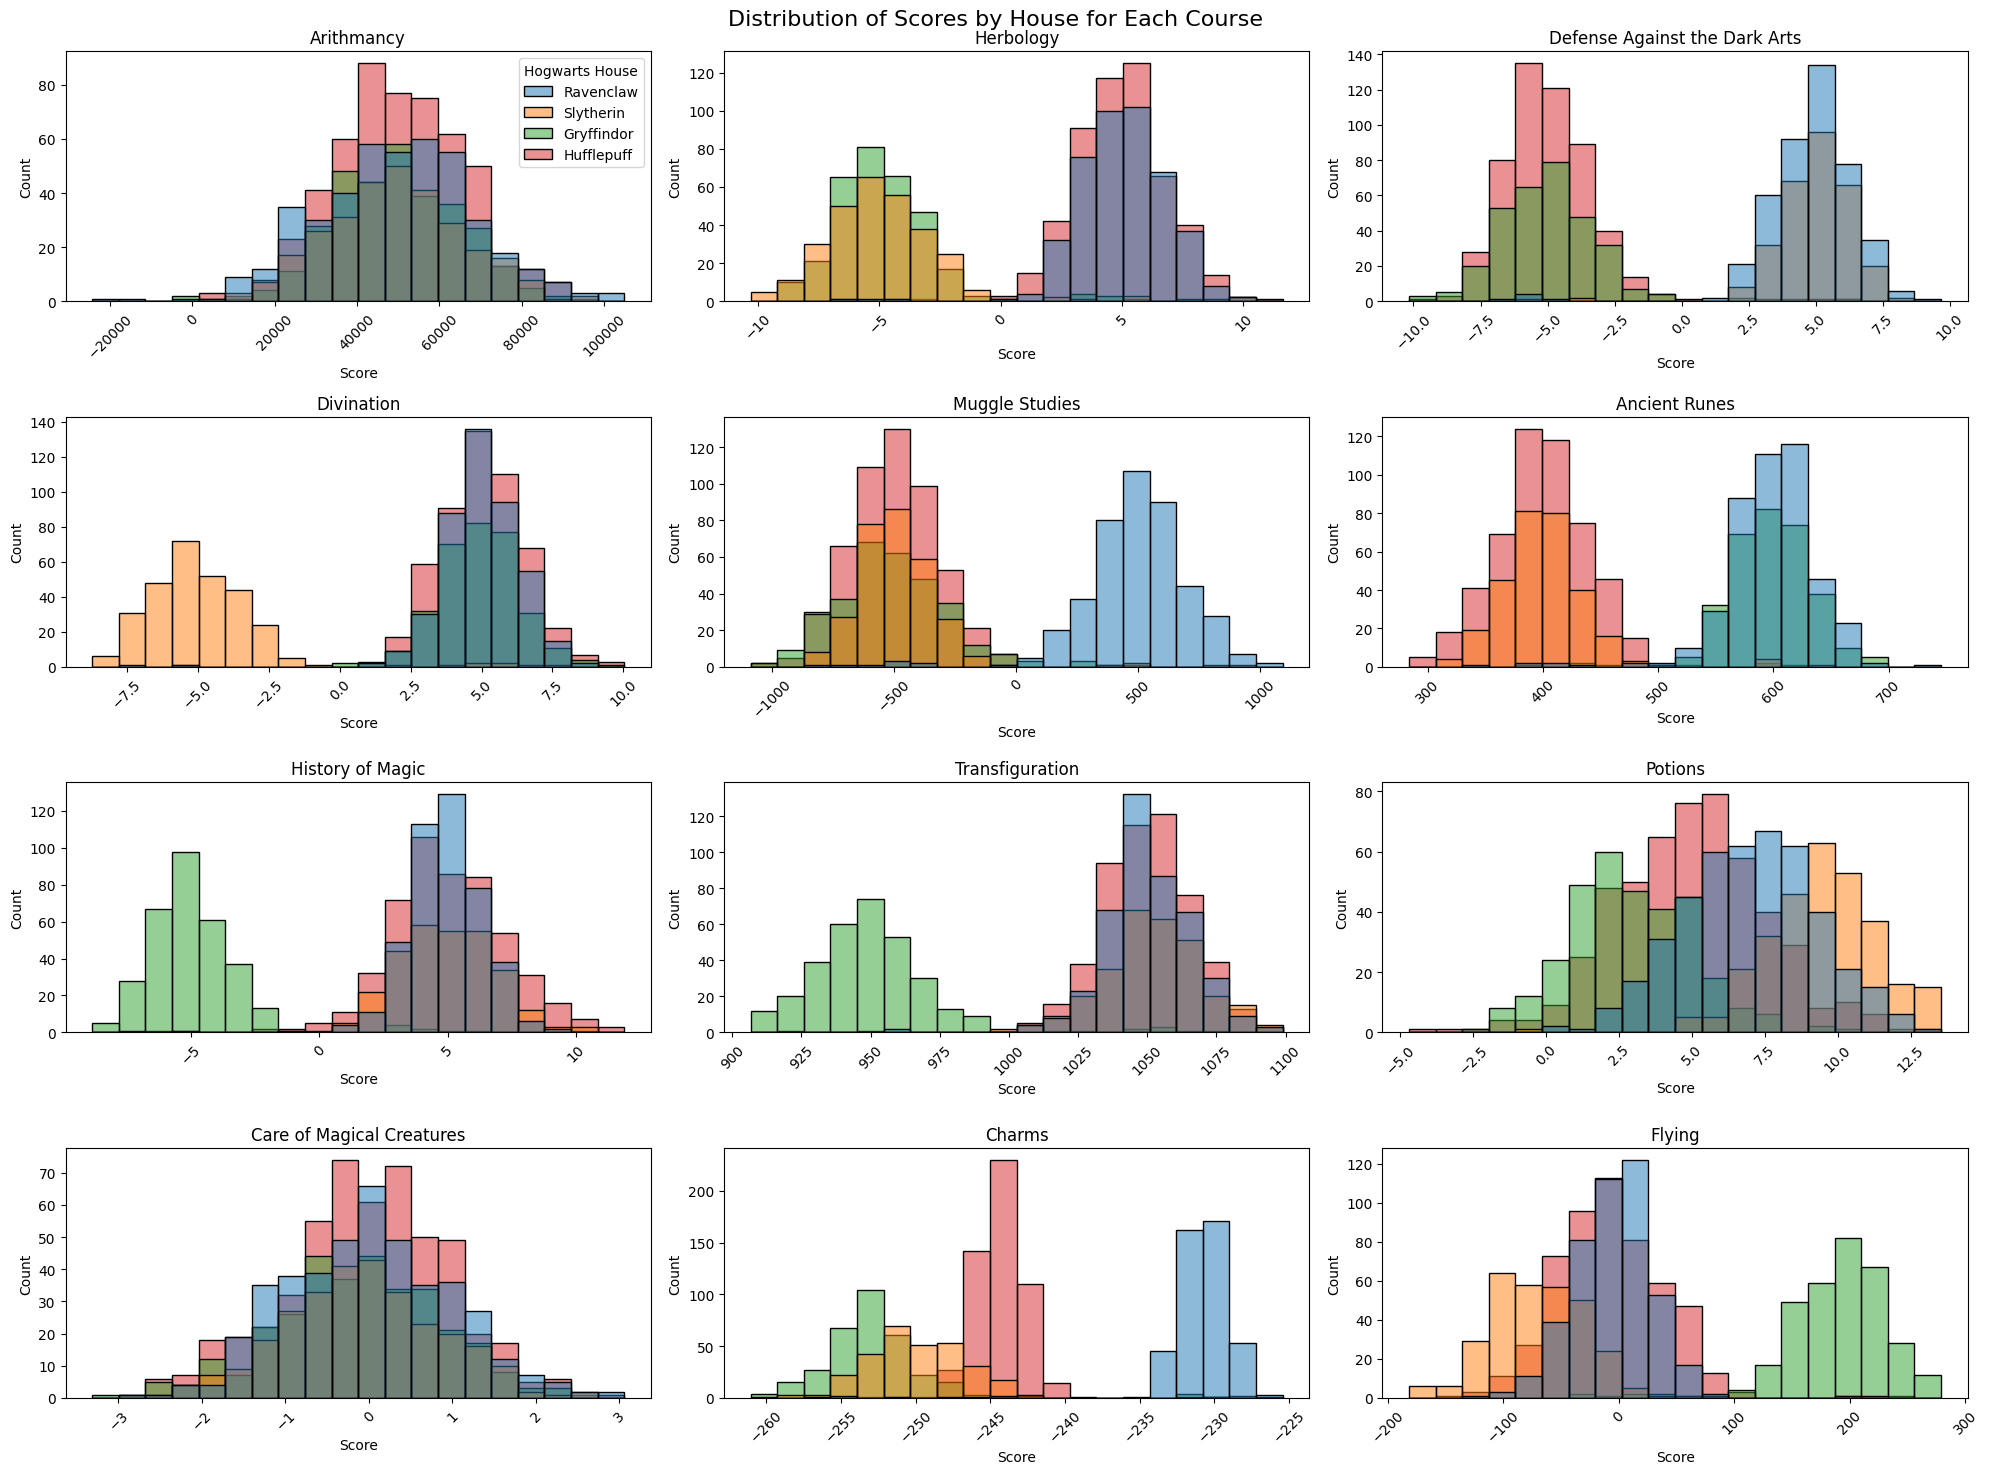

In [33]:
fig = plt.figure(figsize=(20, 15))
fig.suptitle('Distribution of Scores by House for Each Course', fontsize=16)

for idx, course in enumerate(courses, 1):
    plt.subplot(4, 3, idx)

    sns.histplot(data=df, x=course, hue='Hogwarts House', 
                bins=20, alpha=0.5, multiple="layer")
    
    plt.title(course)
    plt.xlabel('Score')
    plt.ylabel('Count')

    plt.xticks(rotation=45)
    
    if idx != 1:
        plt.legend([],[], frameon=False)

plt.tight_layout()

plt.savefig('../output/histogram.png')
plt.show()
plt.close()